In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.cluster import KMeans


#Get MNIST dataset
X,y = fetch_openml("mnist_784", return_X_y=True)

print(X.shape)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\clust

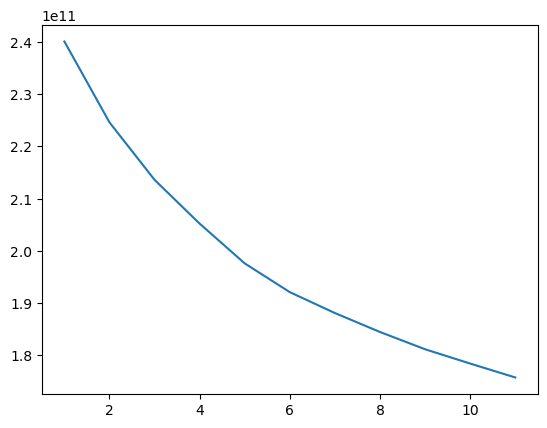

In [2]:
# Pre Processing

#Find best K
K = []

for i in range(1,12):
    model = KMeans(i)
    model.fit(X,y)
    K.append(np.abs(model.score(X)))



plt.plot(np.arange(1,12),K)
plt.show()

In [5]:
# Pre Processing

n_clusters = 10

root_svm = SVC()
root_svm.fit(X,y)

kmeans_model = KMeans(n_clusters=n_clusters)
kmeans_model.fit(X)

svm_models = []

for i in range(n_clusters):
    svc_model = SVC()
    svc_model.fit(X[kmeans_model.labels_ == i], y[kmeans_model.labels_ == i])
    print(svc_model.score(X[kmeans_model.labels_ == i], y[kmeans_model.labels_ == i]) * 100)
    svm_models.append(svc_model)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


98.52005327808199
98.86841578209493
98.72788250260206
99.29196944289174
98.81576974966272
98.62654320987654
98.72568745808182
99.25009373828271
98.24594492644285
98.72484558677027


In [7]:
import cv2 as cv

In [13]:
#Single test

import cv2 as cv
from sklearn.linear_model import LogisticRegression

vector = np.ravel(cv.imread("6_28x28.png", cv.IMREAD_GRAYSCALE)).reshape(1, -1)
print(f'Input image of number 6')

# 1
cluster_id = kmeans_model.predict(vector)[0]
print(f"Plan 1 - Sample is in Cluster {cluster_id}")
print(svm_models[cluster_id].predict(vector))


# 2
print("Plan 2 - Predict By All models")
for model in svm_models:
    print(model.predict(vector))

# 3
print("Plan 3 - Predict By All SVM model")
print(root_svm.predict(vector))

# 4
print("Plan 3 - Predict By Logistic Regression model")
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
print(model.predict(vector))

6
Plan 1 - Sample is in Cluster 4
['2']
Plan 2 - Predict By All models
['8']
['7']
['5']
['0']
['2']
['5']
['4']
['2']
['2']
['6']
Plan 3 - Predict By All SVM model
['5']
Plan 3 - Predict By Logistic Regression model


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names


['6']


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
